<font size=6 face=雅黑>Baseline笔记</font>
<br></br>
<font size=5 face=雅黑>1. 相关库</font>
<br></br>
Pandas 是 Python 语言的一个扩展程序库，用于数据分析。
<br></br>
Sklearn 是一个机器学习、深度学习中非常常用的 Python 第三方库，内部封装了多种机器学习算法与数据处理算法，提供了包括数据清洗、数据预处理、建模调参、数据验证、数据可视化的全流程功能，是入门机器学习的必备工具。
<br></br>
<font size=3 face=雅黑>1.1 库安装</font>

In [ ]:
# 安装 pandas
pip install pandas

# 使用 conda 安装
conda install pandas

# 安装 sklearn
pip install scikit-learn
# 使用 conda 安装
conda install scikit-learn

<font size=3 face=雅黑>1.2 相关包</font>
<br></br>
Sklearn 封装了多种机器学习模型，常见的模型都可以在 sklearn 中找到，sklearn 根据模型的类别组织在不同的包中，此处介绍几个常用包：
  - sklearn.linear_model：线性模型，如线性回归、逻辑回归、岭回归等
  - sklearn.tree：树模型，一般为决策树
  - sklearn.neighbors：最近邻模型，常见如 K 近邻算法
  - sklearn.svm：支持向量机
  - sklearn.ensemble：集成模型，如 AdaBoost、GBDT等
<br></br>
本案例中，我们可以使用 sklearn.linear_model.LogisticRegression 来调用已实现的逻辑回归模型：

In [ ]:
# 引入模型
model = LogisticRegression()
# 可以在初始化时控制超参的取值，此处使用默认值，具体参数可以查阅官方文档

# 开始训练，这里可以考虑修改默认的batch_size与epoch来取得更好的效果
# 此处的 train_vector 是已经经过特征提取的训练数据
model.fit(train_vector, train['label'])

# 利用模型对测试集label标签进行预测，此处的 test_vector 同样是已经经过特征提取的测试数据
test['label'] = model.predict(test_vector)

<br></br>
<font size=5 face=雅黑>2. 特征提取</font>
<br></br>
特征提取是机器学习任务中的一个重要步骤。我们将训练数据的每一个维度称为一个特征，例如，如果我们想要基于二手车的品牌、价格、行驶里程数三个变量来预测二手车的价格，则品牌、价格、行驶里程数为该任务的三个特征。所谓特征提取，即从训练数据的特征集合中创建新的特征子集的过程。提取出来的特征子集特征数一般少于等于原特征数，但能够更好地表征训练数据的情况，使用提取出的特征子集能够取得更好的预测效果。对于 NLP、CV 任务，我们通常需要将文本、图像特征提取为计算机可以处理的数值向量特征。我们一般可以使用 sklearn 库中的 feature_extraction 包来实现文本与图片的特征提取。
在 NLP 任务中，特征提取一般需要将自然语言文本转化为数值向量表示，常见的方法包括基于 TF-IDF（词频-逆文档频率）提取或基于 BOW（词袋模型）提取等，两种方法均在 sklearn.feature_extraction 包中有所实现。
<br></br>
<font size=3 face=雅黑>2.1 基于 TF-IDF 提取</font>
<br></br>
TF-IDF(term frequency–inverse document frequency)是一种用于信息检索与数据挖掘的常用加权技术，其中，TF 指 term frequence，即词频，指某个词在文章中出现次数与文章总词数的比值；IDF 指 inverse document frequence，即逆文档频率，指包含某个词的文档数占语料库总文档数的比例。每个词最终的 IF-IDF 即为 TF 值乘以 IDF 值。计算出每个词的 TF-IDF 值后，使用 TF-IDF 计算得到的数值向量替代原文本即可实现基于 TF-IDF 的文本特征提取。
<br></br>
例如：
$$TF(今天|文档1）= \frac{词在文档一的出现频率}{文档一的总词数} = \frac{1}{3} $$
$$TF(今天|文档2）= \frac{词在文档二的出现频率}{文档二的总词数} = \frac{1}{4}$$
$$TF(今天|文档3）= 0$$
$$IDF(今天）= log\frac{语料库文档总数}{出现该词的文档数} = log\frac{3}{2}$$
<br></br>
我们可以使用 sklearn.feature_extraction.text 中的 TfidfVectorizer 类来简单实现文档基于 TF-IDF 的特征提取：

In [ ]:
# 首先导入该类
from sklearn.feature_extraction.text import TfidfVectorizer

# 假设我们已从本地读取数据为 DataFrame 类型，并已经过基本预处理，data 为已处理的 DataFrame 数据
# 实例化一个 TfidfVectorizer 对象，并使用 fit 方法来拟合数据
vector = TfidfVectorizer().fit(data["text"])

# 拟合之后，调用 transform 方法即可得到提取后的特征数据
train_vector = vector.transform()

<br></br>
<font size=3 face=雅黑>2.2 基于 BOW 提取</font>
<br></br>
BOW（Bag of Words）是一种常用的文本表示方法，其基本思想是假定对于一个文本，忽略其词序和语法、句法，仅仅将其看做是一些词汇的集合，而文本中的每个词汇都是独立的。简单说就是讲每篇文档都看成一个袋子（因为里面装的都是词汇，所以称为词袋，Bag of words即因此而来），然后看这个袋子里装的都是些什么词汇，将其分类。具体而言，词袋模型表示一个文本，首先会维护一个词库，词库里维护了每一个词到一个数值向量的映射关系。例如，最简单的映射关系是独热编码，假设词库里一共有四个词，今天、天气、很、不好，那么独热编码会将四个词分别编码为：
<br></br>
今天——（1,0,0,0）
<br></br>
天气——（0,1,0,0）
<br></br>
很  ——（0,0,1,0）
<br></br>
不好——（0,0,0,1）
<br></br>
而使用词袋模型，就会将上述这句话编码为：
<br></br>
  $$BOW(Sentence）= 
Embedding(今天) + Embedding(天气) + Embedding(很) + Embedding(不好) 
= (1,1,1,1）$$
<br></br>
我们一般使用 sklearn.feature_extraction.text 中的 CountVectorizer 类来简单实现文档基于频数统计的 BOW 特征提取，其主要方法与 TfidfVectorizer 的主要使用方法一致：

In [ ]:
# 首先导入该类
from sklearn.feature_extraction.text import CountVectorizer

# 假设我们已从本地读取数据为 DataFrame 类型，并已经过基本预处理，data 为已处理的 DataFrame 数据
# 实例化一个 CountVectorizer 对象，并使用 fit 方法来拟合数据
vector = CountVectorizer().fit(data["text"])

# 拟合之后，调用 transform 方法即可得到提取后的特征数据
train_vector = vector.transform()

<br></br>
<font size=5 face=雅黑>3. 数据探索</font>
<br></br>
<font size=3 face=雅黑>3.1 使用pandas读取数据</font>
<br></br>
在这部分内容里我们利用 pd.read_csv() 方法对赛题数据进行读取，pd.read_csv() 参数为需要读取的数据地址，读取后返回一个 DataFrame 数据

In [ ]:
import pandas as pd
train = pd.read_csv('./基于论文摘要的文本分类与关键词抽取挑战赛公开数据/train.csv')
train['title'] = train['title'].fillna('')
train['abstract'] = train['abstract'].fillna('')

test = pd.read_csv('./基于论文摘要的文本分类与关键词抽取挑战赛公开数据/testB.csv')
test['title'] = test['title'].fillna('')
test['abstract'] = test['abstract'].fillna('')

通过 DataFrame.apply(len).describe() 方法查看数据长度

In [ ]:
print(train['text'].apply(len).describe())

In [ ]:
count     6000.000000
mean      1620.251500
std        496.956005
min        286.000000
25%       1351.750000
50%       1598.500000
75%       1885.000000
max      10967.000000
Name: text, dtype: float64

观察输出发现数据长度平均值在1620左右
<br></br>
通过DataFrame.value_counts()方法查看数据数量

In [ ]:
print(train["label"].value_counts())

In [ ]:
label
0    3079
1    2921
Name: count, dtype: int64

观察输出发现01标签分布的比较均匀，也就是说我们不必担心数据分布不均而发生过拟合，保证模型的泛化能力

<br></br>
<font size=5 face=雅黑>4. 数据清洗</font>
<br></br>
数据清洗的作用是利用有关技术如数理统计、数据挖掘或预定义的清理规则将脏数据转化为满足数据质量要求的数据。主要包括缺失值处理、异常值处理、数据分桶、特征归一化/标准化等流程。
<br></br>
同时由于表格中存在较多列，我们将这些列的重要内容组合在一起生成一个新的列方便训练

In [ ]:

# 提取文本特征，生成训练集与测试集
train['text'] = train['title'].fillna('') + ' ' +  train['author'].fillna('') + ' ' + train['abstract'].fillna('')+ ' ' + train['Keywords'].fillna('')
test['text'] = test['title'].fillna('') + ' ' +  test['author'].fillna('') + ' ' + test['abstract'].fillna('')


pandas中fillna()方法，能够使用指定的方法填充NA/NaN值。如果数据集中某行缺少title author abstract中的内容，我们需要利用fillna()来保证不会出现报错。

<br></br>
<font size=5 face=雅黑>5. 特征工程</font>
<br></br>
特征工程指的是把原始数据转变为模型训练数据的过程，目的是获取更好的训练数据特征。特征工程能使得模型的性能得到提升，有时甚至在简单的模型上也能取得不错的效果。
<br></br>
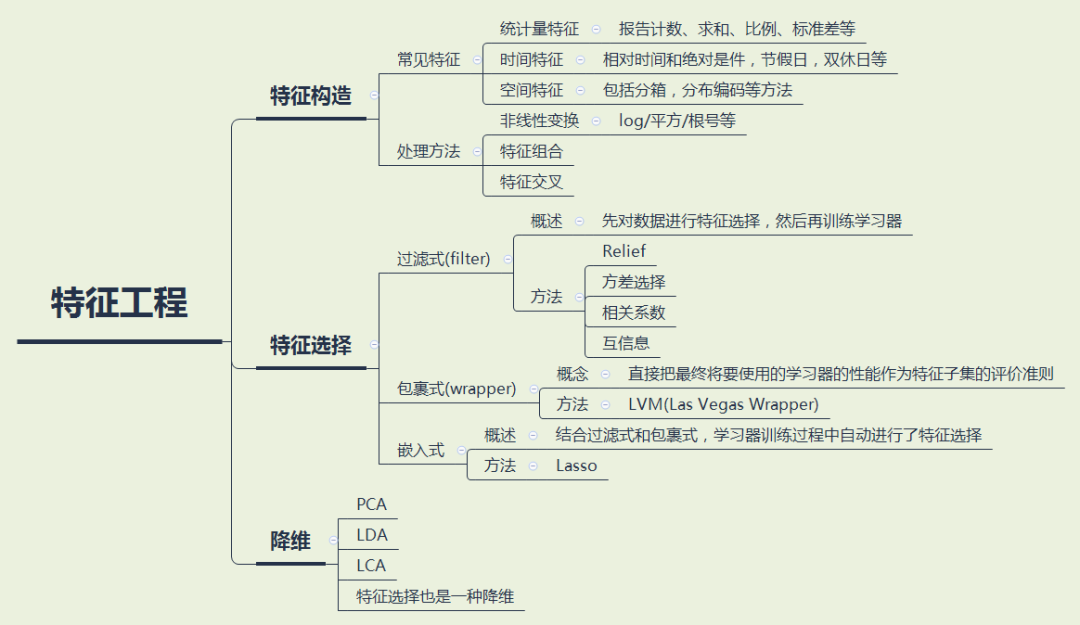
<br></br>
这里我们选择使用BOW将文本转换为向量表示我们选择使用BOW将文本转换为向量表示

In [ ]:
#特征工程
vector = CountVectorizer().fit(train['text'])
train_vector = vector.transform(train['text'])
test_vector = vector.transform(test['text'])

<br></br>
<font size=5 face=雅黑>6. 模型训练与验证</font>
<br></br>
特征工程也好，数据清洗也罢，都是为最终的模型来服务的，模型的建立和调参决定了最终的结果。模型的选择决定结果的上限， 如何更好的去达到模型上限取决于模型的调参。
<br></br>
建模的过程需要我们对常见的线性模型、非线性模型有基础的了解。模型构建完成后，需要掌握一定的模型性能验证的方法和技巧

In [ ]:
# 模型训练
model = LogisticRegression()

# 开始训练，这里可以考虑修改默认的batch_size与epoch来取得更好的效果
model.fit(train_vector, train['label'])

<br></br>
<font size=5 face=雅黑>7. 结果输出</font>
<br></br>

In [ ]:
# 利用模型对测试集label标签进行预测
test['label'] = model.predict(test_vector)
test['Keywords'] = test['title'].fillna('')
# 生成任务一推测结果
test[['uuid', 'Keywords', 'label']].to_csv('submit_task1.csv', index=None)

<font size=3 face=雅黑>完整代码如下：</font>

In [ ]:
# 导入pandas用于读取表格数据
import pandas as pd

# 导入BOW（词袋模型），可以选择将CountVectorizer替换为TfidfVectorizer（TF-IDF（词频-逆文档频率）），注意上下文要同时修改，亲测后者效果更佳
from sklearn.feature_extraction.text import CountVectorizer

# 导入LogisticRegression回归模型
from sklearn.linear_model import LogisticRegression

# 过滤警告消息
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)


# 读取数据集
train = pd.read_csv('./基于论文摘要的文本分类与关键词抽取挑战赛公开数据/train.csv')
train['title'] = train['title'].fillna('')
train['abstract'] = train['abstract'].fillna('')

test = pd.read_csv('./基于论文摘要的文本分类与关键词抽取挑战赛公开数据/testB.csv')
test['title'] = test['title'].fillna('')
test['abstract'] = test['abstract'].fillna('')


# 提取文本特征，生成训练集与测试集
train['text'] = train['title'].fillna('') + ' ' +  train['author'].fillna('') + ' ' + train['abstract'].fillna('')+ ' ' + train['Keywords'].fillna('')
test['text'] = test['title'].fillna('') + ' ' +  test['author'].fillna('') + ' ' + test['abstract'].fillna('')

vector = CountVectorizer().fit(train['text'])
train_vector = vector.transform(train['text'])
test_vector = vector.transform(test['text'])


# 引入模型
model = LogisticRegression()

# 开始训练，这里可以考虑修改默认的batch_size与epoch来取得更好的效果
model.fit(train_vector, train['label'])

# 利用模型对测试集label标签进行预测
test['label'] = model.predict(test_vector)
# 因为任务一并不涉及关键词提取，而提交中需要这一行所以我们用title列填充Keywords列
test['Keywords'] = test['title'].fillna('')
# 生成任务一推测结果
test[['uuid', 'Keywords', 'label']].to_csv('submit_task1.csv', index=None)